In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

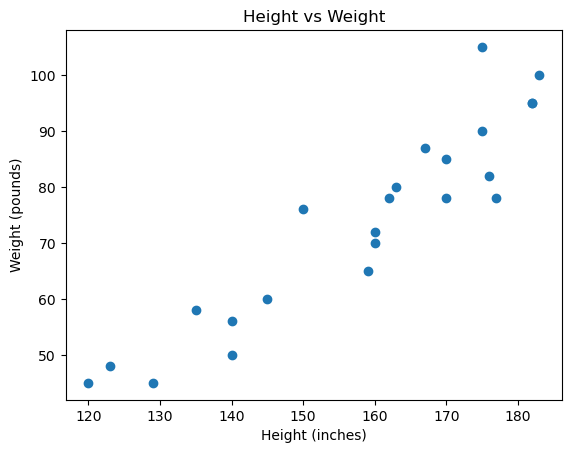

In [7]:
#Scatterplot
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight')

Correlation between Height and Weight: 0.93


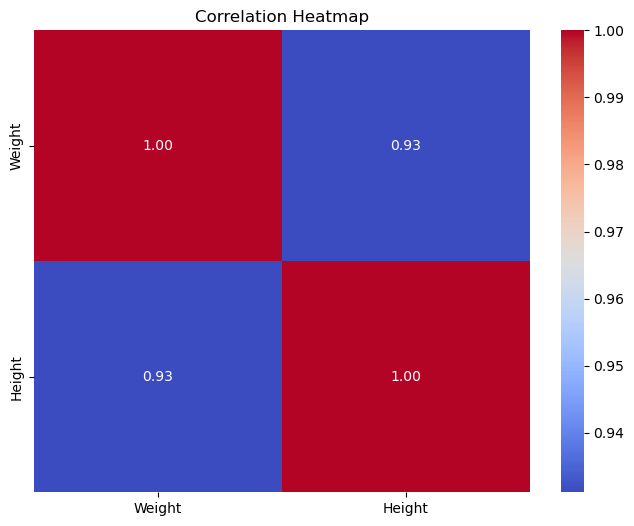

In [8]:
###Correlation
correlation = df['Height'].corr(df['Weight'])
print(f'Correlation between Height and Weight: {correlation:.2f}')
#Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

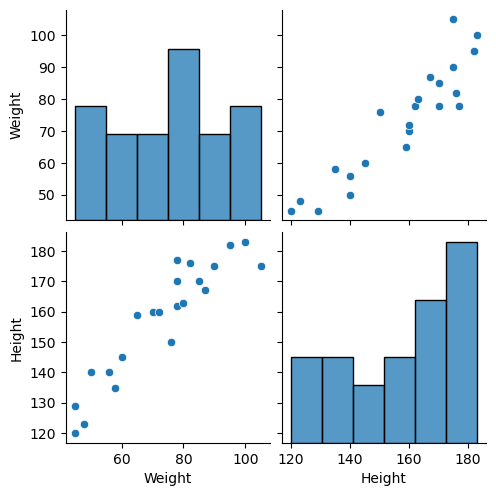

In [9]:
import seaborn as sns
# Pairplot
sns.pairplot(df)

In [24]:
## Independent and Dependent Variables
X=df[['Weight']]## Independent Variable should be in data frame
y=df['Height']  ## Dependent Variable should be in series or 1D array
X.head(), y.head()
# Convert to numpy arrays
type(X)
np.array(X,y).shape

(23, 1)

In [59]:
from sklearn.model_selection import train_test_split

# Assuming X is your DataFrame of features and y is the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shapes AFTER splitting
print(X_train.shape)
print(y_train.shape)

(17, 1)
(17,)


In [60]:
## Standardization
from sklearn.preprocessing import StandardScaler


In [61]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [62]:
X_test=scaler.transform(X_test)

In [63]:
## Aplly Simple Linear Regression
from sklearn.linear_model import LinearRegression


In [64]:
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [72]:
print("coefficent or slope:",regression.coef_)
print( " Intercept:",regression.intercept_)

coefficent or slope: [17.2982057]
 Intercept: 156.47058823529412


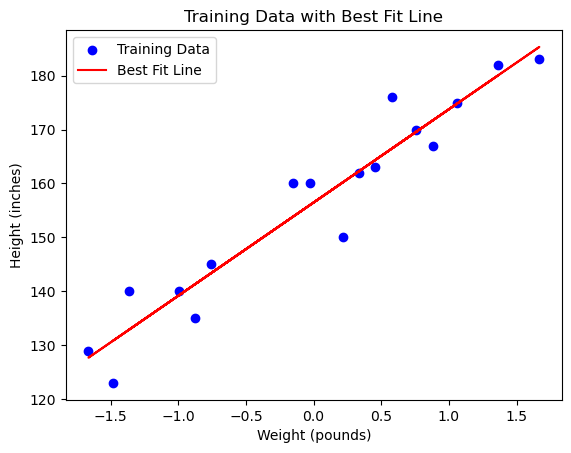

In [75]:
#Plot training data plot best fit line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, regression.predict(X_train), color='red', label='Best Fit Line')
plt.xlabel('Weight (pounds)')   
plt.ylabel('Height (inches)')
plt.title('Training Data with Best Fit Line')
plt.legend()


In [78]:
## Predicting on test data
y_pred=regression.predict(X_test)
y_pred


array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

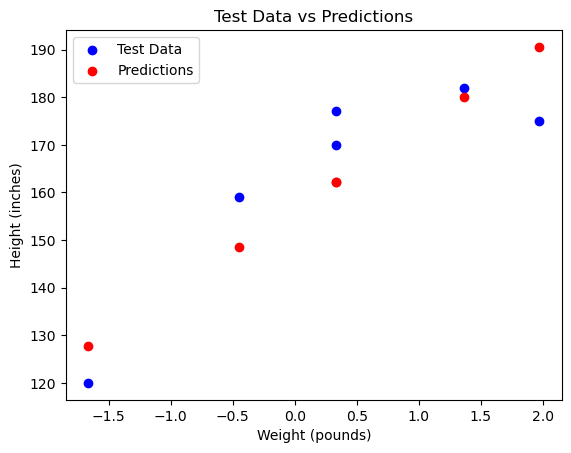

In [79]:
# Plotting the predictions
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('Weight (pounds)')
plt.ylabel('Height (inches)')
plt.title('Test Data vs Predictions')
plt.legend()


In [83]:
##Permormace matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error
# Calculate performance metrics
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

# Residuals plot

Root Mean Squared Error: 10.72
Mean Squared Error: 114.84
R-squared: 0.74
Mean Absolute Error: 9.67
r2


                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.15e-09
Time:                        10:48:48   Log-Likelihood:                -51.726
No. Observations:                  17   AIC:                             107.5
Df Residuals:                      15   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.4706      1.310    119.477      0.0

c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


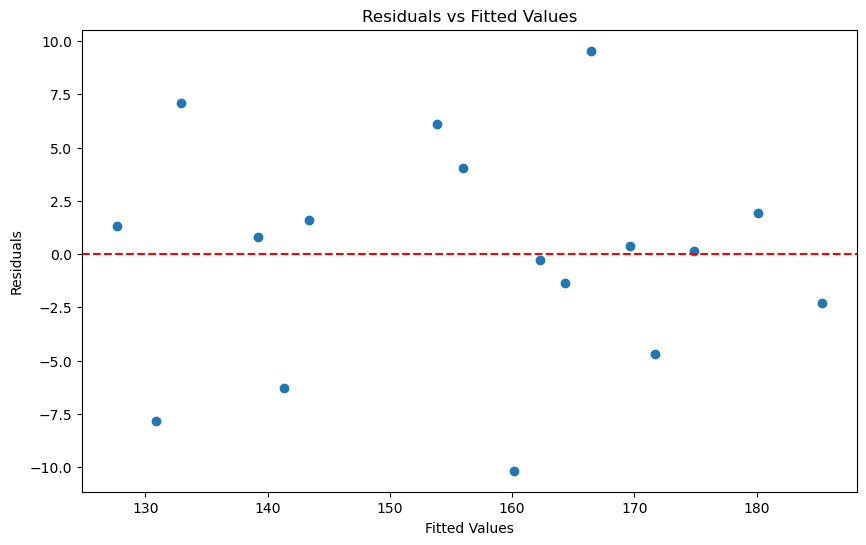

In [84]:
##OLS linear regression
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)  # Add constant term for intercept
model = sm.OLS(y_train, X_train_sm).fit()  # Fit the model
print(model.summary())
# Residuals plot
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [91]:
## Predction on new data
regression.predict(scaler.transform([[72]]))

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])